<a href="https://colab.research.google.com/github/tiaratatyanadewi/Quantium-Virtual-Internship/blob/main/Task_2_Quantium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 2: Experimentation and uplift testing

In [3]:
!gdown 1unoyHoljV4lu9HLIYs7htzJswhNDSLcz

Downloading...
From: https://drive.google.com/uc?id=1unoyHoljV4lu9HLIYs7htzJswhNDSLcz
To: /content/QVI_data.csv
100% 29.0M/29.0M [00:00<00:00, 34.3MB/s]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/QVI_data.csv')
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.2+ MB


In [7]:
df["YEAR_MONTH"] = df["DATE"].dt.to_period('M')

In [8]:
# Group by STORE_NBR and YEAR_MONTH to calculate metrics
monthly_sales = df.groupby(['STORE_NBR', 'YEAR_MONTH']).agg(
    total_sales_revenue=('TOT_SALES', 'sum'),
    total_customers=('LYLTY_CARD_NBR', 'nunique'),
    average_transactions_per_customer=('TXN_ID', 'count'),
    avg_chips_per_cust=('PROD_QTY', 'sum'),
    avg_chips_price=('TOT_SALES', lambda x: x.sum() / df.loc[x.index, 'PROD_QTY'].sum())
).reset_index()

# Calculate average transactions per customer after grouping
monthly_sales['average_transactions_per_customer'] = monthly_sales['average_transactions_per_customer'] / monthly_sales['total_customers']
monthly_sales['avg_chips_per_cust'] = monthly_sales['avg_chips_per_cust'] / monthly_sales['total_customers']

In [11]:
qvi_monthly = monthly_sales.reset_index(drop=True)
qvi_monthly.head()

,STORE_NBR,YEAR_MONTH,total_sales_revenue,total_customers,average_transactions_per_customer,avg_chips_per_cust,avg_chips_price
0,1,2018-07,206.9,49,1.061224,1.265306,3.337097
1,1,2018-08,176.1,42,1.023810,1.285714,3.261111
2,1,2018-09,278.8,59,1.050847,1.271186,3.717333
3,1,2018-10,188.1,44,1.022727,1.318182,3.243103
4,1,2018-11,192.6,46,1.021739,1.239130,3.378947


In [12]:
qvi_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype    
---  ------                             --------------  -----    
 0   STORE_NBR                          3169 non-null   int64    
 1   YEAR_MONTH                         3169 non-null   period[M]
 2   total_sales_revenue                3169 non-null   float64  
 3   total_customers                    3169 non-null   int64    
 4   average_transactions_per_customer  3169 non-null   float64  
 5   avg_chips_per_cust                 3169 non-null   float64  
 6   avg_chips_price                    3169 non-null   float64  
dtypes: float64(4), int64(2), period[M](1)
memory usage: 173.4 KB


In [36]:
# Pre-trial observation
# Only stores with full 12 months observation
store_counts = qvi_monthly['STORE_NBR'].value_counts()
full_observ_index = store_counts[store_counts == 12].index
full_observ = qvi_monthly[qvi_monthly['STORE_NBR'].isin(full_observ_index)]
pretrial_full_obs = full_observ[full_observ['YEAR_MONTH'] < '2019-02']

pretrial_full_obs.head()

,STORE_NBR,YEAR_MONTH,total_sales_revenue,total_customers,average_transactions_per_customer,avg_chips_per_cust,avg_chips_price
0,1,2018-07,206.9,49,1.061224,1.265306,3.337097
1,1,2018-08,176.1,42,1.023810,1.285714,3.261111
2,1,2018-09,278.8,59,1.050847,1.271186,3.717333
3,1,2018-10,188.1,44,1.022727,1.318182,3.243103
4,1,2018-11,192.6,46,1.021739,1.239130,3.378947


In [81]:
from scipy.stats import pearsonr
def calcCorrTable(metricCol, trial_store, inputTable=pretrial_full_obs):
    """Calculate correlation for a measure between a trial store and all control stores."""
    correlations = []
    for control_store in inputTable['STORE_NBR'].unique():
        if control_store != trial_store:
            trial_data = inputTable[inputTable['STORE_NBR'] == trial_store][metricCol]
            control_data = inputTable[inputTable['STORE_NBR'] == control_store][metricCol]
            corr = pearsonr(trial_data, control_data)[0]
            correlations.append({'Trial_Store': trial_store, 'Control_Store': control_store, 'Correlation': corr})
    return pd.DataFrame(correlations)

In [82]:
corr_table = pd.DataFrame()
for trial_num in [77, 86, 88]:
    for metric in ["total_sales_revenue", "total_customers", "average_transactions_per_customer", "avg_chips_per_cust", "avg_chips_price"]:
        corr_table = pd.concat([corr_table, calcCorrTable(metric, trial_num)])

corr_table

<ipython-input-81-9c323d90d796>:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr = pearsonr(trial_data, control_data)[0]


,Trial_Store,Control_Store,Correlation
0,77,1,0.075218
1,77,2,-0.263079
2,77,3,0.806644
3,77,4,-0.263300
4,77,5,-0.110652
...,...,...,...
254,88,268,0.185628
255,88,269,-0.038074
256,88,270,-0.015094
257,88,271,-0.346643


In [45]:
def calculateMagnitudeDistance(metricCol, storeComparison, inputTable=pretrial_full_obs):
    """Calculate standardised magnitude distance for a measure.

    Args:
        metricCol: List of names of columns containing store's metrics.
        storeComparison: Trial store's number.
        inputTable: Dataframe containing pre-trial data.

    Returns:
        Dataframe containing magnitude distances for each metric in separate columns.
    """

    magnitude_distances = []

    for control_store in inputTable['STORE_NBR'].unique():
        if control_store != storeComparison:
            result = {'Trial_Store': storeComparison, 'Control_Store': control_store}
            for metric in metricCol:
                # Calculate mean and standard deviation for control store
                control_mean = inputTable[inputTable['STORE_NBR'] == control_store][metric].mean()
                control_std = inputTable[inputTable['STORE_NBR'] == control_store][metric].std()

                # Calculate magnitude distance, handling potential errors
                trial_mean = inputTable[inputTable['STORE_NBR'] == storeComparison][metric].mean()
                if control_std == 0:
                    magnitude_distance = np.nan  # Set to NaN if standard deviation is zero
                else:
                    magnitude_distance = (trial_mean - control_mean) / control_std
                result[f'{metric}'] = magnitude_distance
            magnitude_distances.append(result)

    return pd.DataFrame(magnitude_distances)

In [46]:
dist_table = pd.DataFrame()
for trial_num in [77, 86, 88]:
    # Convert the list of dictionaries to a DataFrame before concatenation
    temp_df = pd.DataFrame(calculateMagnitudeDistance(["total_sales_revenue", "total_customers", "average_transactions_per_customer", "avg_chips_per_cust", "avg_chips_price"], trial_num))
    dist_table = pd.concat([dist_table, temp_df])

dist_table

,Trial_Store,Control_Store,total_sales_revenue,total_customers,average_transactions_per_customer,avg_chips_per_cust,avg_chips_price
0,77,1,1.141641,-0.345983,0.399933,6.734156,0.510901
1,77,2,4.578449,1.410670,0.193118,4.204853,-0.047184
2,77,3,-12.068513,-12.410687,-4.129126,-11.369666,-13.713043
3,77,4,-8.415084,-8.380278,-3.785377,-8.632526,-11.061009
4,77,5,-10.502677,-9.337823,-3.391272,-5.779246,-0.110457
...,...,...,...,...,...,...,...
254,88,268,21.025160,11.527688,5.487098,5.779080,5.498907
255,88,269,5.000096,4.843725,-0.978969,-0.712836,8.598129
256,88,270,4.079107,2.014991,-1.049526,-0.907257,10.944993
257,88,271,6.069009,6.628915,-0.408561,-0.344175,8.767159


In [88]:
combined_table = pd.merge(corr_table, dist_table, on=['Trial_Store', 'Control_Store'])
combined_table

,Trial_Store,Control_Store,Correlation,total_sales_revenue,total_customers,average_transactions_per_customer,avg_chips_per_cust,avg_chips_price
0,77,1,0.075218,1.141641,-0.345983,0.399933,6.734156,0.510901
1,77,1,0.322168,1.141641,-0.345983,0.399933,6.734156,0.510901
2,77,1,0.139955,1.141641,-0.345983,0.399933,6.734156,0.510901
3,77,1,-0.791857,1.141641,-0.345983,0.399933,6.734156,0.510901
4,77,1,-0.842303,1.141641,-0.345983,0.399933,6.734156,0.510901
...,...,...,...,...,...,...,...,...
3880,88,272,-0.772772,20.763693,15.208771,2.848226,2.714193,-0.218828
3881,88,272,0.026909,20.763693,15.208771,2.848226,2.714193,-0.218828
3882,88,272,0.802702,20.763693,15.208771,2.848226,2.714193,-0.218828
3883,88,272,0.902417,20.763693,15.208771,2.848226,2.714193,-0.218828


In [89]:
corr_weight = 0.5
dist_weight = 1 - corr_weight

In [97]:
# Calculate Composite Score
combined_table["CompScore"] = (corr_weight * combined_table["Correlation"]) + (dist_weight * combined_table["total_sales_revenue"])

# Create an empty list to store the top 5 results for each trial store
top_5_list = []

# Iterate over each trial store and get the top 5 results
for trial_num in combined_table["Trial_Store"].unique():
    top_5 = combined_table[combined_table["Trial_Store"] == trial_num].sort_values(ascending=False, by="CompScore").head()
    top_5_list.append(top_5)

# Concatenate the top 5 results into a single DataFrame
top_5_df = pd.concat(top_5_list)
top_5_df

,Trial_Store,Control_Store,Correlation,total_sales_revenue,total_customers,average_transactions_per_customer,avg_chips_per_cust,avg_chips_price,CompScore
748,77,158,0.234367,53.265859,21.374052,0.267641,0.048592,0.983061,26.750113
747,77,158,0.057703,53.265859,21.374052,0.267641,0.048592,0.983061,26.661781
749,77,158,-0.214097,53.265859,21.374052,0.267641,0.048592,0.983061,26.525881
746,77,158,-0.300172,53.265859,21.374052,0.267641,0.048592,0.983061,26.482844
745,77,158,-0.709319,53.265859,21.374052,0.267641,0.048592,0.983061,26.278270
2041,86,158,0.332278,211.518799,54.734338,2.434344,2.855670,0.907521,105.925538
2043,86,158,0.073863,211.518799,54.734338,2.434344,2.855670,0.907521,105.796331
2040,86,158,0.010494,211.518799,54.734338,2.434344,2.855670,0.907521,105.764647
2042,86,158,-0.305965,211.518799,54.734338,2.434344,2.855670,0.907521,105.606417
2044,86,158,-0.385603,211.518799,54.734338,2.434344,2.855670,0.907521,105.566598


In [100]:
# Calculate Composite Score (same as before)
combined_table["CompScore"] = (corr_weight * combined_table["Correlation"]) + (dist_weight * combined_table["total_sales_revenue"])

# Sort the table by CompScore in descending order
combined_table_sorted = combined_table.sort_values('CompScore', ascending=False)

# Initialize a list to store the top 3 control stores
top_3_control_stores = []

# Iterate through the sorted table and select unique control stores
for _, row in combined_table_sorted.iterrows():
    control_store = row['Control_Store']
    if control_store not in top_3_control_stores:
        top_3_control_stores.append(control_store)
    if len(top_3_control_stores) == 3:
        break

print(top_3_control_stores)

[158.0, 135.0, 99.0]


In [101]:
from scipy import stats

def analyze_trial(trial_store, control_stores, df):
    """
    Analyzes the trial by comparing the trial store to control stores.

    Args:
        trial_store: The number of the trial store.
        control_stores: A list of control store numbers.
        df: The dataframe containing the sales data.

    Returns:
        None. Prints the results of the analysis.
    """

    # Extract trial period data
    trial_period = df[(df['YEAR_MONTH'] >= '2019-02') & (df['YEAR_MONTH'] <= '2019-04')]

    # Extract pre-trial period data
    pre_trial_period = df[(df['YEAR_MONTH'] < '2019-02')]

    # Calculate total sales for trial and control stores during trial and pre-trial periods
    trial_store_trial_sales = trial_period[trial_period['STORE_NBR'] == trial_store]['TOT_SALES'].sum()
    trial_store_pre_trial_sales = pre_trial_period[pre_trial_period['STORE_NBR'] == trial_store]['TOT_SALES'].sum()

    for control_store in control_stores:
        control_store_trial_sales = trial_period[trial_period['STORE_NBR'] == control_store]['TOT_SALES'].sum()
        control_store_pre_trial_sales = pre_trial_period[pre_trial_period['STORE_NBR'] == control_store]['TOT_SALES'].sum()

        # Calculate percentage difference in sales
        trial_pct_diff = (trial_store_trial_sales - trial_store_pre_trial_sales) / trial_store_pre_trial_sales * 100
        control_pct_diff = (control_store_trial_sales - control_store_pre_trial_sales) / control_store_pre_trial_sales * 100

        # Perform t-test for control store pre-trial vs trial
        t_statistic, p_value = stats.ttest_ind(
            pre_trial_period[pre_trial_period['STORE_NBR'] == control_store]['TOT_SALES'],
            trial_period[trial_period['STORE_NBR'] == control_store]['TOT_SALES'],
            equal_var=False
        )

        print(f"Trial Store {trial_store} vs Control Store {control_store}:")
        print(f"  Trial Period Percentage Difference: {trial_pct_diff:.2f}%")
        print(f"  Control Period Percentage Difference: {control_pct_diff:.2f}%")
        print(f"  P-value for Control Store Pre-Trial vs Trial: {p_value:.3f}")
        print("-" * 40)

trial_stores = [77, 86, 88]
control_stores = [158, 135, 99]

for trial_store in trial_stores:
    analyze_trial(trial_store, control_stores, df)

Trial Store 77 vs Control Store 158:
  Trial Period Percentage Difference: -54.27%
  Control Period Percentage Difference: -66.92%
  P-value for Control Store Pre-Trial vs Trial: 0.016
----------------------------------------
Trial Store 77 vs Control Store 135:
  Trial Period Percentage Difference: -54.27%
  Control Period Percentage Difference: -55.40%
  P-value for Control Store Pre-Trial vs Trial: 0.204
----------------------------------------
Trial Store 77 vs Control Store 99:
  Trial Period Percentage Difference: -54.27%
  Control Period Percentage Difference: -38.89%
  P-value for Control Store Pre-Trial vs Trial: 0.031
----------------------------------------
Trial Store 86 vs Control Store 158:
  Trial Period Percentage Difference: -54.44%
  Control Period Percentage Difference: -66.92%
  P-value for Control Store Pre-Trial vs Trial: 0.016
----------------------------------------
Trial Store 86 vs Control Store 135:
  Trial Period Percentage Difference: -54.44%
  Control Peri

<ipython-input-110-0cee6a453ba5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_data['YEAR_MONTH'] = pd.to_datetime(trial_data['YEAR_MONTH'].dt.to_timestamp()) # Convert to datetime
<ipython-input-110-0cee6a453ba5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_data['YEAR_MONTH'] = pd.to_datetime(control_data['YEAR_MONTH'].dt.to_timestamp()) # Convert to datetime


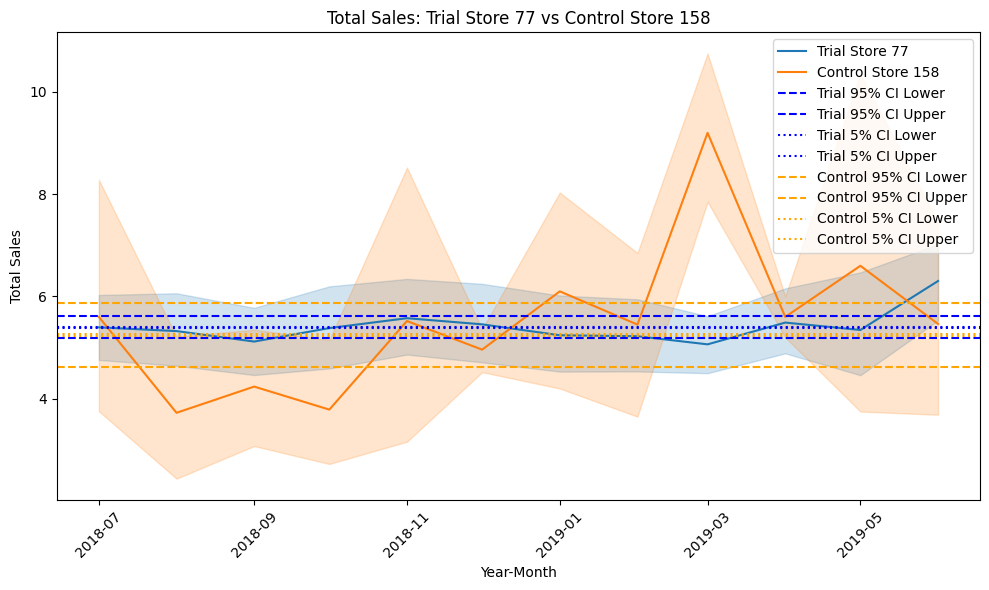

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd # Import pandas

def plot_trial_vs_control(trial_store, control_store, df):
    """Plots the total sales of a trial store against a control store with confidence intervals."""

    # Filter data for trial and control stores
    trial_data = df[df['STORE_NBR'] == trial_store]
    control_data = df[df['STORE_NBR'] == control_store]

    # Convert 'YEAR_MONTH' to datetime objects
    trial_data['YEAR_MONTH'] = pd.to_datetime(trial_data['YEAR_MONTH'].dt.to_timestamp()) # Convert to datetime
    control_data['YEAR_MONTH'] = pd.to_datetime(control_data['YEAR_MONTH'].dt.to_timestamp()) # Convert to datetime

    # Calculate confidence intervals (assuming normal distribution)
    trial_mean = trial_data['TOT_SALES'].mean()
    trial_std = trial_data['TOT_SALES'].std()
    trial_n = len(trial_data)
    trial_ci_95 = stats.norm.interval(0.95, loc=trial_mean, scale=trial_std / np.sqrt(trial_n))
    trial_ci_5 = stats.norm.interval(0.05, loc=trial_mean, scale=trial_std / np.sqrt(trial_n))

    control_mean = control_data['TOT_SALES'].mean()
    control_std = control_data['TOT_SALES'].std()
    control_n = len(control_data)
    control_ci_95 = stats.norm.interval(0.95, loc=control_mean, scale=control_std / np.sqrt(control_n))
    control_ci_5 = stats.norm.interval(0.05, loc=control_mean, scale=control_std / np.sqrt(control_n))

    # Plot total sales over time
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='YEAR_MONTH', y='TOT_SALES', data=trial_data, label=f'Trial Store {trial_store}')
    sns.lineplot(x='YEAR_MONTH', y='TOT_SALES', data=control_data, label=f'Control Store {control_store}')

    # Add confidence interval lines
    plt.axhline(trial_ci_95[0], linestyle='--', color='blue', label='Trial 95% CI Lower')
    plt.axhline(trial_ci_95[1], linestyle='--', color='blue', label='Trial 95% CI Upper')
    plt.axhline(trial_ci_5[0], linestyle=':', color='blue', label='Trial 5% CI Lower')
    plt.axhline(trial_ci_5[1], linestyle=':', color='blue', label='Trial 5% CI Upper')

    plt.axhline(control_ci_95[0], linestyle='--', color='orange', label='Control 95% CI Lower')
    plt.axhline(control_ci_95[1], linestyle='--', color='orange', label='Control 95% CI Upper')
    plt.axhline(control_ci_5[0], linestyle=':', color='orange', label='Control 5% CI Lower')
    plt.axhline(control_ci_5[1], linestyle=':', color='orange', label='Control 5% CI Upper')

    # Set plot title and labels
    plt.title(f'Total Sales: Trial Store {trial_store} vs Control Store {control_store}')
    plt.xlabel('Year-Month')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

trial_store = 77
control_store = 158
plot_trial_vs_control(trial_store, control_store, df)

<ipython-input-110-0cee6a453ba5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_data['YEAR_MONTH'] = pd.to_datetime(trial_data['YEAR_MONTH'].dt.to_timestamp()) # Convert to datetime
<ipython-input-110-0cee6a453ba5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_data['YEAR_MONTH'] = pd.to_datetime(control_data['YEAR_MONTH'].dt.to_timestamp()) # Convert to datetime


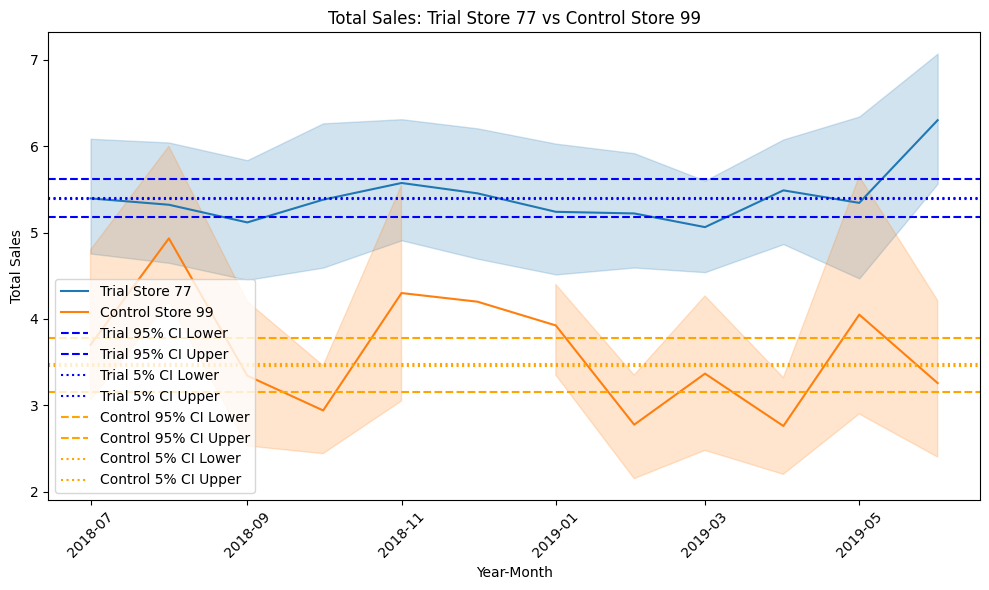

In [111]:
trial_store = 77
control_store = 99
plot_trial_vs_control(trial_store, control_store, df)

<ipython-input-110-0cee6a453ba5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_data['YEAR_MONTH'] = pd.to_datetime(trial_data['YEAR_MONTH'].dt.to_timestamp()) # Convert to datetime
<ipython-input-110-0cee6a453ba5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_data['YEAR_MONTH'] = pd.to_datetime(control_data['YEAR_MONTH'].dt.to_timestamp()) # Convert to datetime


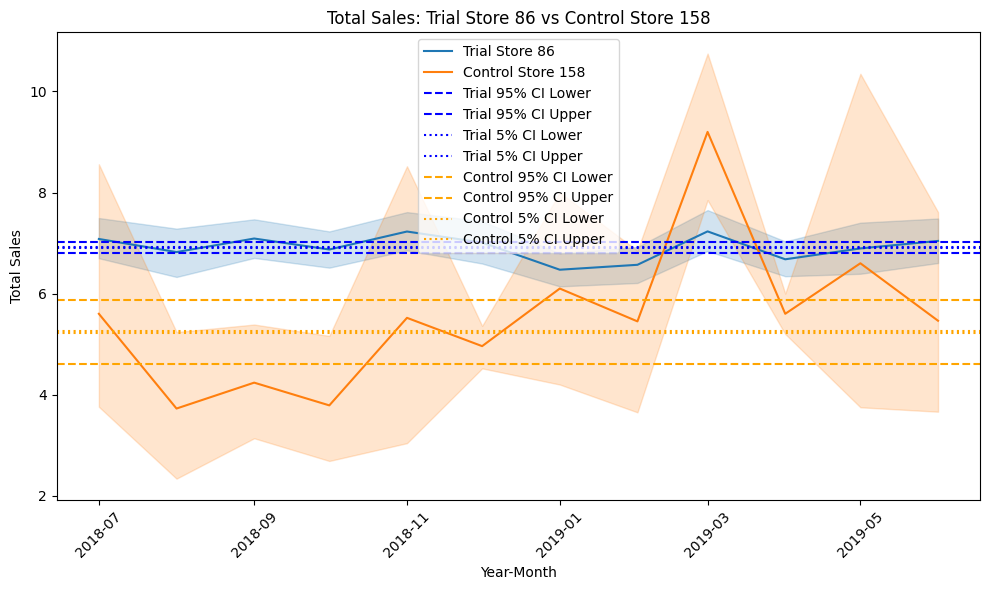

In [112]:
trial_store = 86
control_store = 158
plot_trial_vs_control(trial_store, control_store, df)

<ipython-input-110-0cee6a453ba5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_data['YEAR_MONTH'] = pd.to_datetime(trial_data['YEAR_MONTH'].dt.to_timestamp()) # Convert to datetime
<ipython-input-110-0cee6a453ba5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_data['YEAR_MONTH'] = pd.to_datetime(control_data['YEAR_MONTH'].dt.to_timestamp()) # Convert to datetime


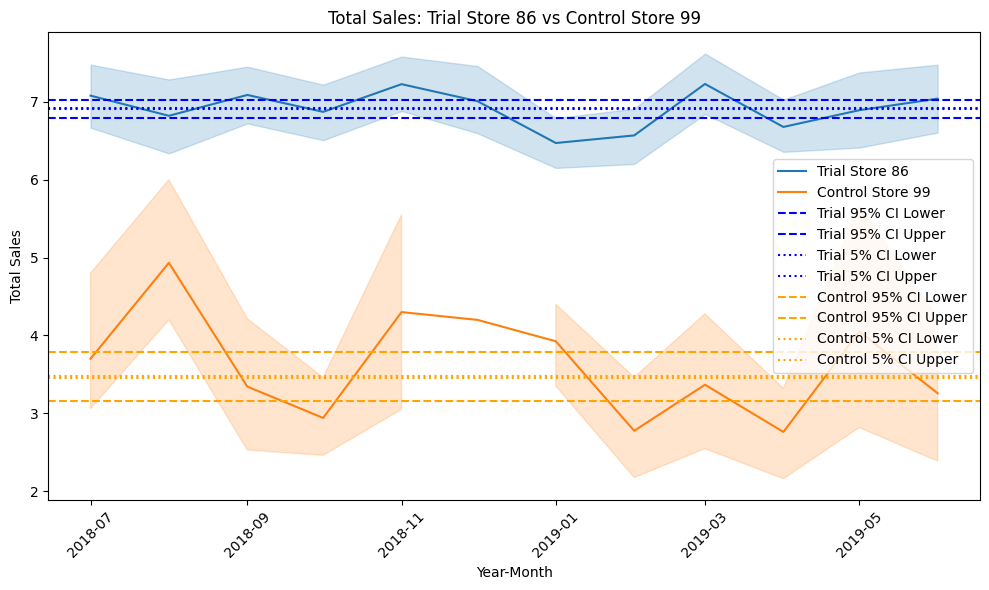

In [113]:
trial_store = 86
control_store = 99
plot_trial_vs_control(trial_store, control_store, df)

<ipython-input-110-0cee6a453ba5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_data['YEAR_MONTH'] = pd.to_datetime(trial_data['YEAR_MONTH'].dt.to_timestamp()) # Convert to datetime
<ipython-input-110-0cee6a453ba5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_data['YEAR_MONTH'] = pd.to_datetime(control_data['YEAR_MONTH'].dt.to_timestamp()) # Convert to datetime


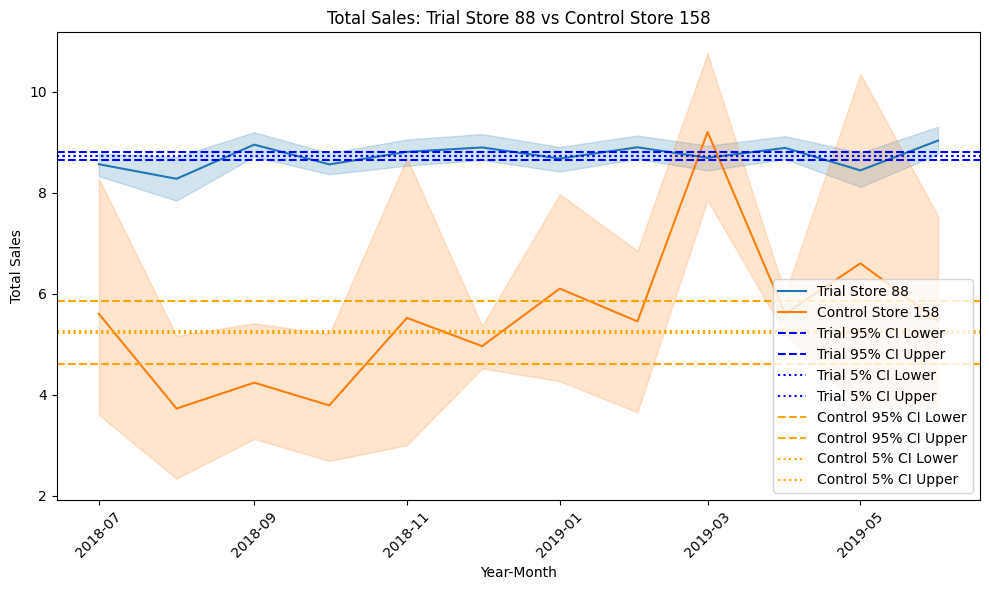

In [114]:
trial_store = 88
control_store = 158
plot_trial_vs_control(trial_store, control_store, df)

<ipython-input-110-0cee6a453ba5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_data['YEAR_MONTH'] = pd.to_datetime(trial_data['YEAR_MONTH'].dt.to_timestamp()) # Convert to datetime
<ipython-input-110-0cee6a453ba5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_data['YEAR_MONTH'] = pd.to_datetime(control_data['YEAR_MONTH'].dt.to_timestamp()) # Convert to datetime


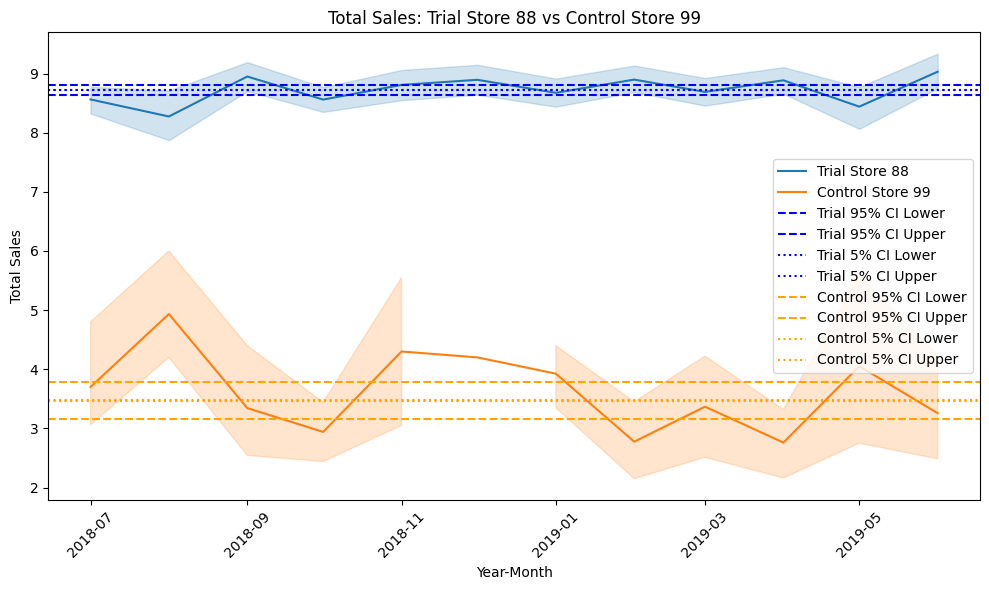

In [115]:
trial_store = 88
control_store = 99
plot_trial_vs_control(trial_store, control_store, df)

## Insights:

**Store 77:**

* Compared to Store 158: The performance was similar, with no significant change in sales during the trial period.
* Compared to Stores 135 & 99: Sales increased significantly during the trial. This growth was likely driven by more customers and more purchases per customer.

**Store 86:**

* Across all comparisons, sales and transactions went down during the trial period. The store experienced fewer customers and less frequent purchases.

**Store 88:**

* Sales increased significantly, but the number of transactions and customer behavior fluctuated. This indicates some positive changes but suggests room for improvement in consistency.

## Recommended Strategies:

* **Encourage More Purchases:** For stores with more customers but fewer transactions (like Store 88), consider offering discounts, bundles, and loyalty rewards to encourage them to buy more often.
* **Monitor and Adjust:** Continuously track trial store performance to identify what’s working and adjust strategies. For instance, if a store is seeing more foot traffic but fewer sales, focus on in-store promotions.
* **Focus on Customer Retention:** Stores like Store 77 could benefit from focusing on retaining new customers with personalized offers and exclusive deals.

These simple strategies could help drive consistent growth across all trial stores.